In [51]:
from raspi_import import raspi_import
import os

os.system("sh sample.sh")
data = raspi_import("data/adcData.bin")

In [15]:
from raspi_import import raspi_import

data = raspi_import("data/adcData.bin")

print(data[1])

[[4095 4095 3642 4095 4095]
 [2414 2999 2119 2137 2122]
 [2430 3011 2141 2158 2142]
 ...
 [2451 3043 2042 2037 2058]
 [2464 3046 2061 2049 2073]
 [2462 3051 2084 2060 2087]]


In [62]:
import numpy as np
from numpy.lib.stride_tricks import as_strided
from numpy import *
from matplotlib.pyplot import *
import scipy.signal as sig
#import scipy.signal as sig

def _check_arg(x, xname):
    x = np.asarray(x)
    if x.ndim != 1:
        raise ValueError('%s must be one-dimensional.' % xname)
    return x

def crosscorrelation(x, y, maxlag):
    """
    Cross correlation with a maximum number of lags.

    `x` and `y` must be one-dimensional numpy arrays with the same length.

    This computes the same result as
        numpy.correlate(x, y, mode='full')[len(a)-maxlag-1:len(a)+maxlag]

    The return vaue has length 2*maxlag + 1.
    """
    x = _check_arg(x, 'x')
    y = _check_arg(y, 'y')
    py = np.pad(y.conj(), 2*maxlag, mode='constant')
    T = as_strided(py[2*maxlag:], shape=(2*maxlag+1, len(y) + 2*maxlag),
                   strides=(-py.strides[0], py.strides[0]))
    px = np.pad(x, maxlag, mode='constant')
    return T.dot(px)
def maxindex(array, maxlag):
    result = np.argmax(abs(array))
    return result-(array.size+1)/2
def signalAngel(arrMic1, arrMic2, arrMic3, maxlag, ploting=False):
    
    x, HpassCoeff = sig.butter(4, 0.02, btype='high', analog=False, output='ba', fs=None)
    filteredMic1 = sig.filtfilt(x, HpassCoeff, arrMic1)
    filteredMic2 = sig.filtfilt(x, HpassCoeff, arrMic2)
    filteredMic3 = sig.filtfilt(x, HpassCoeff, arrMic3)
    
    crosscorr1_2 = sig.correlate(filteredMic1, filteredMic2)
    crosscorr2_3 = sig.correlate(filteredMic2, filteredMic3)
    crosscorr1_3 = sig.correlate(filteredMic1, filteredMic3)    
    t = linspace(-crosscorr1_2.size/2-1, crosscorr1_2.size/2+1, crosscorr1_2.size)
    if ploting:
        print("Mic1")
        plotSig(filteredMic1)
        print("Mic2")
        plotSig(filteredMic2)
        print("Mic3")
        plotSig(filteredMic3)
        print("Cross Corrolation Mic1_2")
        plot(t,crosscorr1_2)
        show()
        print("Cross Corrolation Mic2_3")
        plot(t,crosscorr2_3)
        show()
        print("Cross Corrolation Mic1_3")
        plot(t,crosscorr1_3)
        show()
    #print(crosscorr1_2)
    #print(crosscorr2_3)
    #print(crosscorr3_1)
    indexMax1_2 = maxindex(crosscorr1_2, maxlag)
    indexMax2_3 = maxindex(crosscorr2_3, maxlag)
    indexMax1_3 = maxindex(crosscorr1_3, maxlag)
    #print(indexMax1_2)
    #print(indexMax2_3)
    #print(indexMax1_3)
    rad = np.arctan(np.sqrt(3)*(indexMax1_2+indexMax1_3)/(indexMax1_2-indexMax1_3-2*indexMax2_3))
    #print("angel: "+ str(angel/(np.pi)*180))
    return rad/(np.pi)*180

def plotSig(signal):
    t = linspace(0,1, signal.size)
    plot(t, signal)
    show()

In [48]:
radarI = data[1][:,0]
radarQ = data[1][:,1]

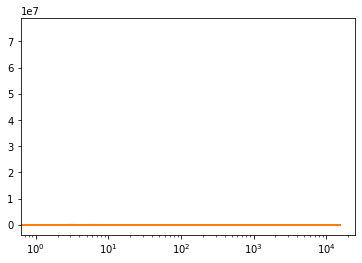

In [52]:
import matplotlib.pyplot as plt
import numpy as np

radarI = data[1][:,0]
radarQ = data[1][:,1]

dataobj = radarI

t = np.arange(0,len(dataobj))

sp = np.fft.fft(dataobj)

freq = np.fft.fftfreq(dataobj.size, d=32e-6)
#freq = np.fft.fftfreq(t.shape[-1])

plt.xscale('log')
#plt.yscale('log')
f_d = abs(freq[np.argmax(sp.imag)])
plt.plot(freq, sp.real, freq, sp.imag)

In [53]:
f_0 = 24.13*10**9
c = 3*10**8
V_r = f_d*c/(2*f_0)
print("Doplershift ferq %f Hz" % (f_d))
print("Speed %f m/s" % (V_r))

Doplershift ferq 205.000000 Hz
Speed 1.274347 m/s


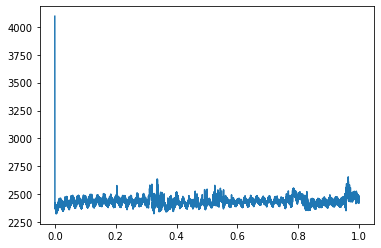

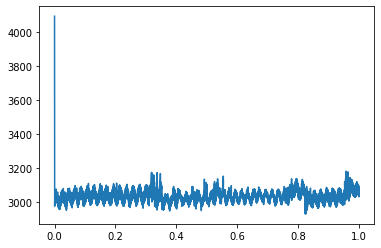

In [21]:
from numpy import *
from matplotlib.pyplot import *
    
t = linspace(0,1, radarI.size)
plot(t,radarI)
show()
plot(t,radarQ)
show()